# Scikit-learn Overview

# Simple Example

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
wine = pd.read_csv("dataset_191_wine.csv")
wine.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD28/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
wine.shape

(178, 14)

In [3]:
wine['class'].value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

In [4]:
y = wine['class']
X = wine.drop('class', axis=1)

In [5]:
X.columns

Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'OD28/OD315', 'Proline'],
      dtype='object')

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
X_train.shape, X_test.shape

((133, 13), (45, 13))

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier(max_leaf_nodes=5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [8]:
import sklearn
# new in 0.21!
sklearn.set_config(print_changed_only=True)
tree

DecisionTreeClassifier(max_leaf_nodes=5)

In [9]:
tree.score(X_train, y_train)

0.9924812030075187

In [10]:
from sklearn.model_selection import cross_validate
# I'm on master, cv=5 by default now!
scores = cross_validate(tree, X_train, y_train)
scores['test_score'].mean()

0.9777574277574278

In [11]:
tree.score(X_test, y_test)

0.8888888888888888

[Text(496.0, 190.26, 'Color_intensity <= 3.82\ngini = 0.658\nsamples = 133\nvalue = [44, 53, 36]'),
 Text(248.0, 135.9, 'OD28/OD315 <= 3.73\ngini = 0.111\nsamples = 51\nvalue = [3, 48, 0]'),
 Text(124.0, 81.53999999999999, 'gini = 0.04\nsamples = 49\nvalue = [1, 48, 0]'),
 Text(372.0, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(744.0, 135.9, 'Flavanoids <= 1.36\ngini = 0.554\nsamples = 82\nvalue = [41, 5, 36]'),
 Text(620.0, 81.53999999999999, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]'),
 Text(868.0, 81.53999999999999, 'Proline <= 719.0\ngini = 0.194\nsamples = 46\nvalue = [41, 5, 0]'),
 Text(744.0, 27.180000000000007, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(992.0, 27.180000000000007, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]')]

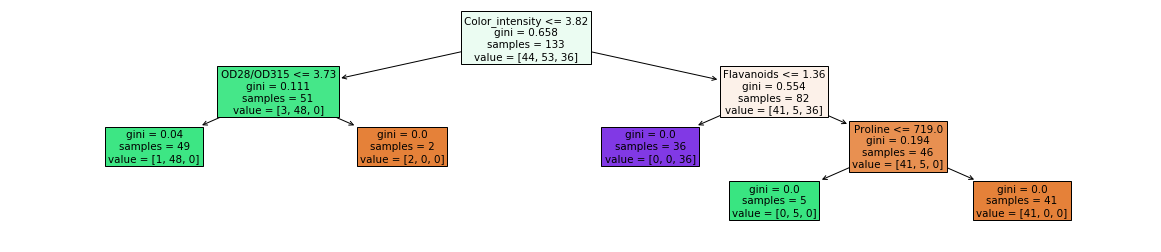

In [12]:
plt.figure(figsize=(20, 4))
# also new in 0.21 !
plot_tree(tree, feature_names=X_train.columns, filled=True)

# More realistic use-case

In [13]:
churn = pd.read_csv("/home/andy/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
churn.shape

(7043, 21)

In [15]:
churn.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [16]:
X = churn.drop(['customerID', 'Churn'], axis=1)
y = churn.Churn

In [17]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [18]:
X.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [19]:
X.TotalCharges.replace(" ", np.NaN, inplace=True)

In [20]:
continuous_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

cont_preprocessing = make_pipeline(StandardScaler(), SimpleImputer())

ct = make_column_transformer((cont_preprocessing, continuous_columns), remainder=OneHotEncoder())

In [23]:
ct.fit_transform(X_train)

array([[-1.00217976,  1.21545932, -0.66806137, ...,  0.        ,
         1.        ,  0.        ],
       [-0.96151798, -1.47237791, -0.93170692, ...,  0.        ,
         0.        ,  1.        ],
       [-0.22960589, -1.47735846, -0.77476142, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.02629698,  0.87014113,  0.26438605, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.13635015, -1.51222232, -0.70223357, ...,  0.        ,
         0.        ,  0.        ],
       [-1.28681224,  1.03283912, -0.96955615, ...,  0.        ,
         1.        ,  0.        ]])

In [24]:
ct.transform(X_train).shape

(5282, 46)

In [25]:
from sklearn.linear_model import LogisticRegression
pipe = make_pipeline(ct, LogisticRegression())
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=OneHotEncoder(),
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('logisticregression', LogisticRegression())])

In [32]:
cross_validate(pipe, X_train, y_train, scoring='recall_macro')

/home/andy/checkout/scikit-learn/sklearn/linear_model/logistic.py:935: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


{'fit_time': array([0.15071607, 0.10131383, 0.11575317, 0.10216713, 0.08599734]),
 'score_time': array([0.02060199, 0.01914644, 0.01665664, 0.01847124, 0.01675153]),
 'test_score': array([0.72940896, 0.70572238, 0.71750736, 0.72573638, 0.72939985])}

In [27]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

pipe_gb = make_pipeline(ct, HistGradientBoostingClassifier())

In [33]:
cross_validate(pipe_gb, X_train, y_train, scoring='recall_macro')

{'fit_time': array([0.7929523 , 0.72438765, 0.71545815, 0.96650386, 0.77386379]),
 'score_time': array([0.02510452, 0.02461934, 0.02770662, 0.03527403, 0.03146291]),
 'test_score': array([0.71649255, 0.70572238, 0.71051178, 0.70867084, 0.70360825])}

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {'histgradientboostingclassifier__max_depth': [2, 3, 5, None]}
grid = GridSearchCV(pipe_gb, param_grid, scoring='recall_macro')
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder=OneHotEncoder(),
                                                          transformers=[('pipeline',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges'])])),
                                       ('histgradientboostingcla

In [35]:
grid.best_score_

0.7223369488309687

In [36]:
grid.best_params_

{'histgradientboostingclassifier__max_depth': 2}

In [37]:
# this is recall_macro, not accuracy!
grid.score(X_test, y_test)

0.714817854767019